In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [25]:
exrcise=pd.read_csv('/workspaces/Daily-machineLearning/CaloriesBurntPrediction/Dataset/exercise.csv')
calories=pd.read_csv('/workspaces/Daily-machineLearning/CaloriesBurntPrediction/Dataset/calories.csv')

In [26]:
df=exrcise.merge(calories,on='User_ID')

In [27]:
df.shape

(15000, 9)

In [28]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [30]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

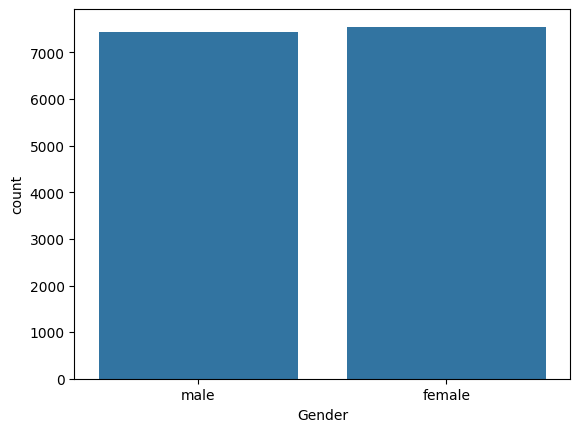

In [31]:
sns.countplot(x='Gender',data=df)

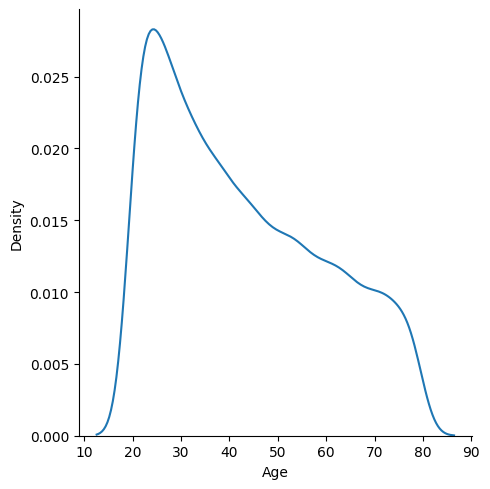

In [32]:
sns.displot(x='Age',data=df,kind='kde')

In [33]:
corellation=df.drop(columns=['User_ID','Gender']).corr()

<Axes: >

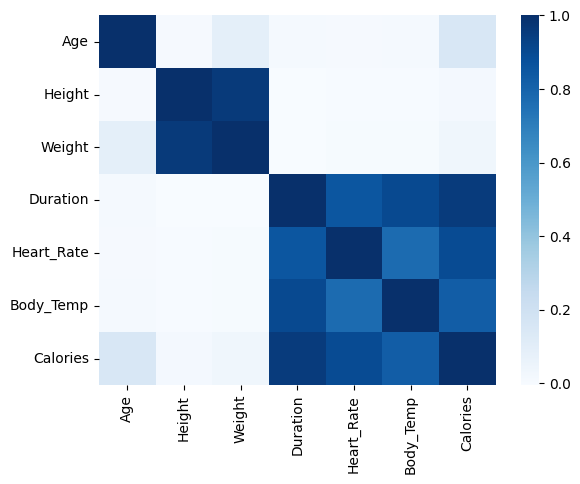

In [34]:
sns.heatmap(corellation,cbar=True,cmap='Blues')

In [35]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [36]:
features=df.drop(columns=['User_ID','Calories'],axis=1)
target=df['Calories']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [38]:
model=RandomForestRegressor(criterion='squared_error')
model.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
print('Training R2 Score',r2_score(Y_train,model.predict(X_train)))

Training R2 Score 0.9996825782852948


In [40]:
print('Testing R2 Score',r2_score(Y_test,model.predict(X_test)))

Testing R2 Score 0.9981566461642574
